## Télécharger un fichier distant


In [1]:
import requests

url = 'https://www.linguee.fr/mp3/EN_UK/b5/b5c0b187fe309af0f4d35982fd961d7e-300.mp3'
r = requests.get(url, allow_redirects=True)

localPath = "./../data/audio/dbg.mp3"
open(localPath, 'wb').write(r.content)

6896

## Afficher un player audio


Fichier local

In [2]:
from IPython import display
d1 = display.Audio(filename=localPath)
d1

Fichier distant

In [3]:
audio_url = "https://www.linguee.fr/mp3/EN_US/b5/b5c0b187fe309af0f4d35982fd961d7e-300.mp3"
d2 = display.Audio(url=audio_url)
d2

## afficher plusieurs widgets

In [4]:
import ipywidgets as widgets

In [5]:
audio_widgets = []

listUrl = []

listUrl.append("https://www.linguee.fr/mp3/EN_UK/b5/b5c0b187fe309af0f4d35982fd961d7e-300.mp3")
listUrl.append("https://www.ldoceonline.com/media/english/ameProns/love1.mp3")
listUrl.append("https://dictionary.cambridge.org/media/english/us_pron/l/lov/love_/love.mp3")

for urlCur in listUrl:
    out = widgets.Output()
    with out:
        
        display.display(display.Audio(url=urlCur))


    audio_widgets.append(out)


widgets.HBox(audio_widgets)

## Librosa

Pour utiliser que librosa puisse lire des mp3 il lui faut par exemple ffmpeg.

Sur sa machine windows, le plus simple est de télécharger un build :https://www.gyan.dev/ffmpeg/builds/


In [28]:
# et d'ajouter le path
!set PATH="C:/Program Files/ffmpeg-4.4.1-full_build/bin"

Sur une machine distante linux, il est possible d'utiliser le code suivant :


In [24]:
# Download latest FFmpeg static build.  
"""
exist = !which ffmpeg
if not exist:
  !curl https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz -o ffmpeg.tar.xz \
     && tar -xf ffmpeg.tar.xz && rm ffmpeg.tar.xz
  ffmdir = !find . -iname ffmpeg-*-static
  path = %env PATH
  path = path + ':' + ffmdir[0]
  %env PATH $path

!which ffmpeg
"""

"\nexist = !which ffmpeg\nif not exist:\n  !curl https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz -o ffmpeg.tar.xz      && tar -xf ffmpeg.tar.xz && rm ffmpeg.tar.xz\n  ffmdir = !find . -iname ffmpeg-*-static\n  path = %env PATH\n  path = path + ':' + ffmdir[0]\n  %env PATH $path\n\n!which ffmpeg\n"

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [34]:
pathHobo = "./../data/audio/longman_hobo.mp3"
y, sr = librosa.load(pathHobo)

NoBackendError: 

In [31]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

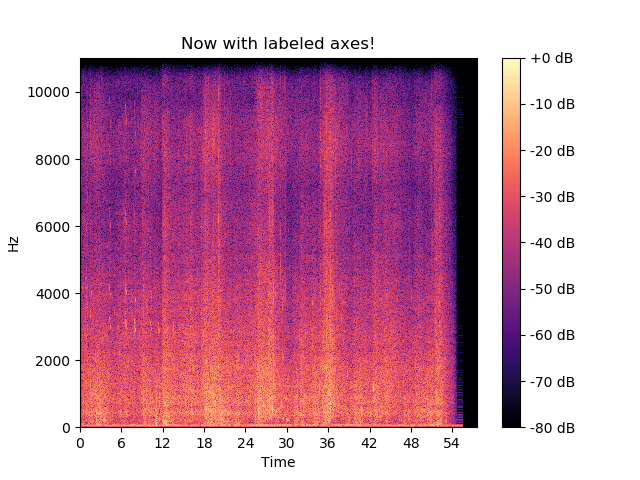

In [32]:
%matplotlib ipympl
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")

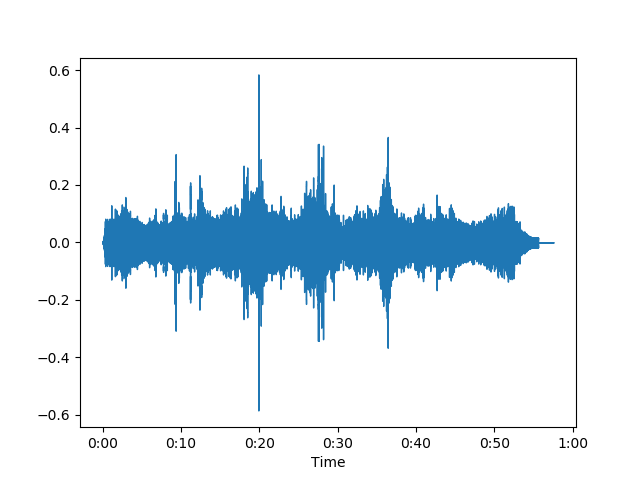

In [33]:
%matplotlib ipympl
fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)